SUMEET SHINDE T116

Practical 10\
AIM: ● Data Visualization and Storytelling\
● Create meaningful visualizations using data visualization tools\
● Combine multiple visualizations to tell a compelling data story.\
● Present the findings and insights in a clear and concise manner.


# 1. IMPORT LIBRARIES

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


# 2 Load the dataset

In [34]:
# 2.1 Load the dataset
df = pd.read_csv("diamonds (2).csv")

print("First 5 rows:")
print(df.head())

First 5 rows:
   carat      cut color clarity  depth  table     x     y     z  price
0   0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326
1   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31    326
2   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31    327
3   0.29  Premium     I     VS2   62.4   58.0  4.20  4.23  2.63    334
4   0.31     Good     J     SI2   63.3   58.0  4.34  4.35  2.75    335


In [35]:
print("\nInfo:")
print(df.info())



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


In [36]:
print("\nSummary statistics:")
print(df.describe(include="all"))


Summary statistics:
               carat    cut  color clarity         depth         table  \
count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21551  11292   13065           NaN           NaN   
mean        0.797940    NaN    NaN     NaN     61.749405     57.457184   
std         0.474011    NaN    NaN     NaN      1.432621      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

                   x             y             z         price  
count   53940.000000  539

In [37]:
df.drop_duplicates(inplace=True)

print("\nMissing values before handling:")
print(df.isnull().sum())


Missing values before handling:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


In [38]:

numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns


for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after handling:")
print(df.isnull().sum())

for col in categorical_cols:
    df[col] = df[col].astype("category")

if "price" in df.columns:
    Q1 = df["price"].quantile(0.25)
    Q3 = df["price"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]



Missing values after handling:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


# 3. DATA VISUALIZATION TECHNIQUES

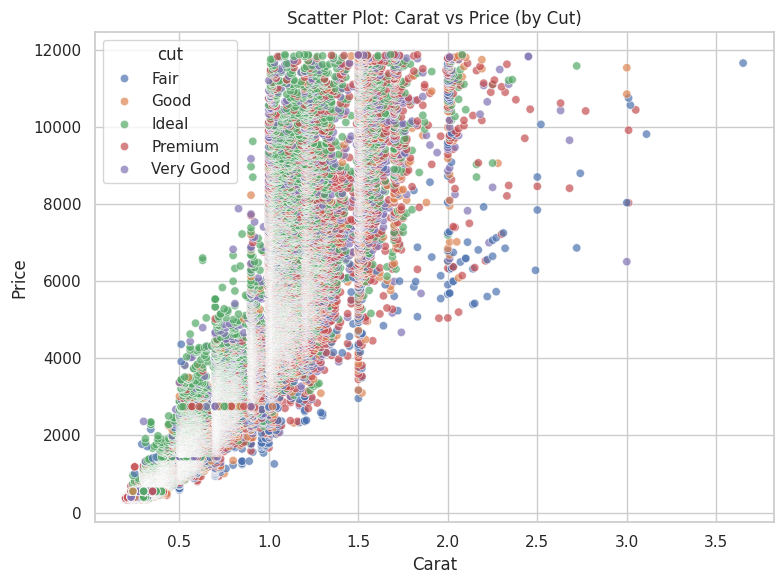

In [39]:
# 3.1 SCATTER PLOT (carat vs price, colored by cut)
if {"carat", "price"}.issubset(df.columns):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x="carat", y="price", hue="cut", alpha=0.7)
    plt.title("Scatter Plot: Carat vs Price (by Cut)")
    plt.xlabel("Carat")
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()

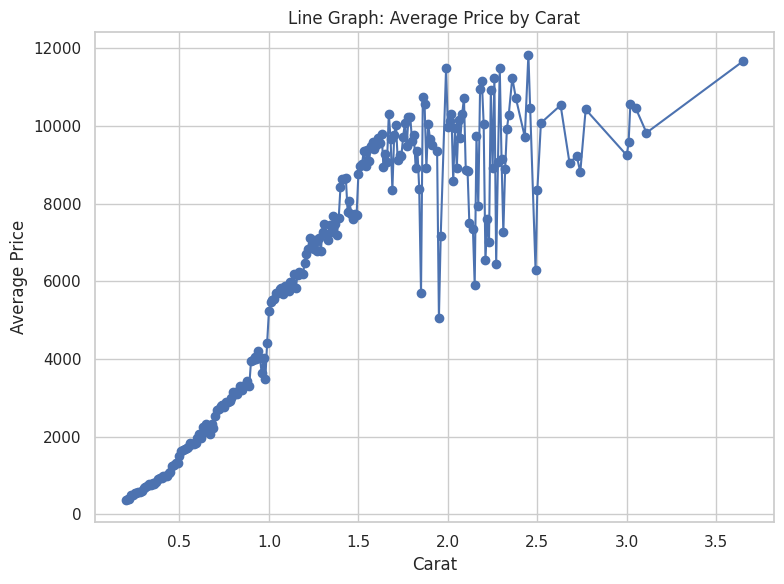

In [40]:
# ---------- 3.2 LINE GRAPH (avg price by carat) ----------
# Group by carat, take mean price, and plot as line
if {"carat", "price"}.issubset(df.columns):
    carat_price = df.groupby("carat")["price"].mean().reset_index().sort_values("carat")
    plt.figure(figsize=(8, 6))
    plt.plot(carat_price["carat"], carat_price["price"], marker="o")
    plt.title("Line Graph: Average Price by Carat")
    plt.xlabel("Carat")
    plt.ylabel("Average Price")
    plt.tight_layout()
    plt.show()

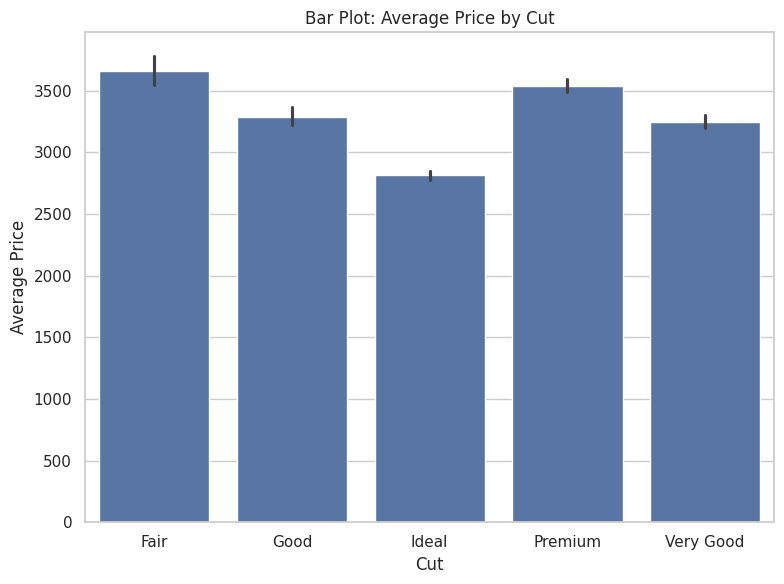

In [41]:
# ---------- 3.3 BAR PLOT (average price by cut) ----------
if {"cut", "price"}.issubset(df.columns):
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df, x="cut", y="price", estimator="mean")
    plt.title("Bar Plot: Average Price by Cut")
    plt.xlabel("Cut")
    plt.ylabel("Average Price")
    plt.tight_layout()
    plt.show()

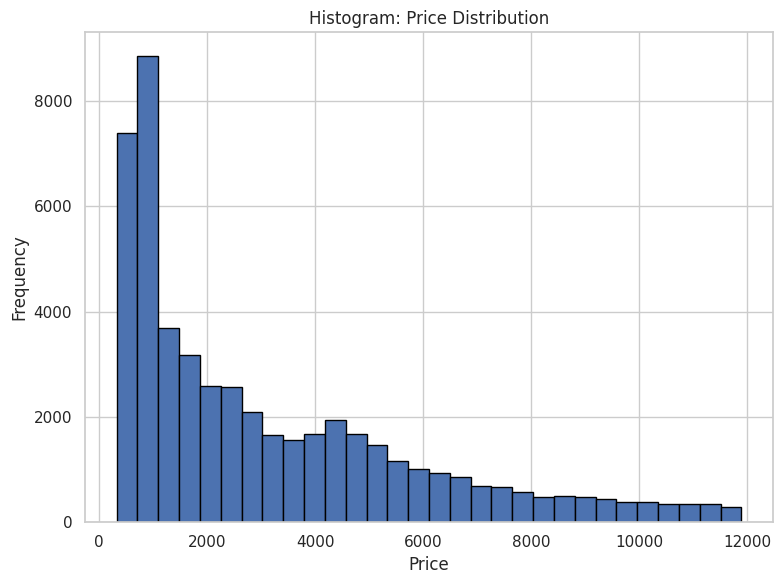

In [42]:
# ---------- 3.4 HISTOGRAM (price distribution) ----------
if "price" in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df["price"], bins=30, edgecolor="black")
    plt.title("Histogram: Price Distribution")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

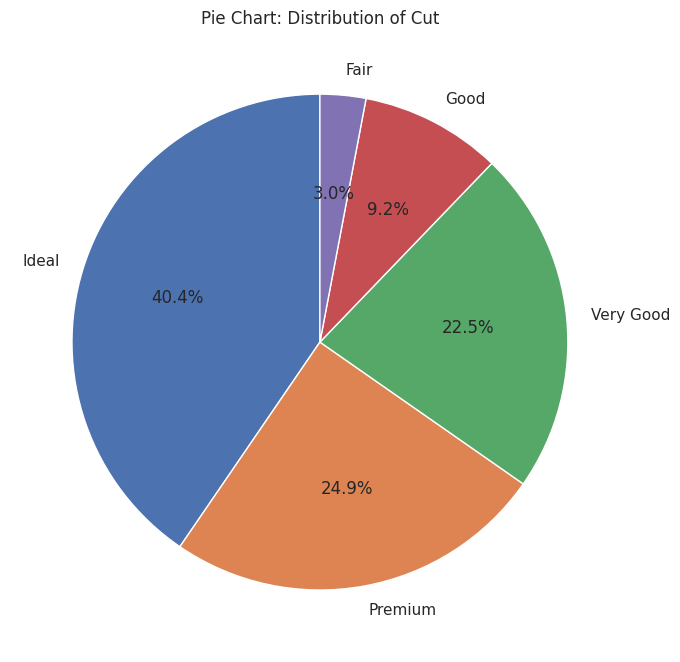

In [43]:
# ---------- 3.5 PIE CHART (share of each cut) ----------
if "cut" in df.columns:
    cut_counts = df["cut"].value_counts()
    plt.figure(figsize=(7, 7))
    plt.pie(cut_counts, labels=cut_counts.index, autopct="%1.1f%%", startangle=90)
    plt.title("Pie Chart: Distribution of Cut")
    plt.tight_layout()
    plt.show()

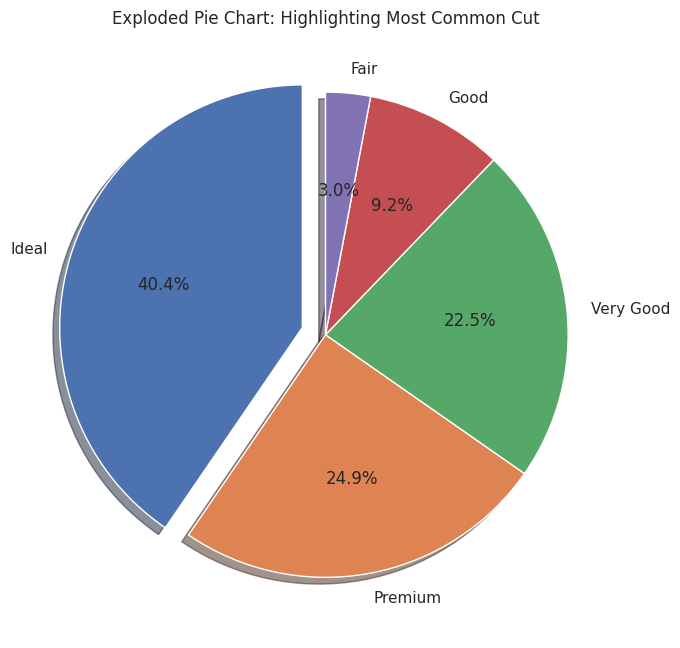

In [44]:

# ---------- 3.6 EXCLUSIVE / EXPLODED PIE CHART ----------
# Explode the largest slice to highlight it
if "cut" in df.columns:
    cut_counts = df["cut"].value_counts()
    explode = [0.1 if i == cut_counts.idxmax() else 0 for i in cut_counts.index]

    plt.figure(figsize=(7, 7))
    plt.pie(
        cut_counts,
        labels=cut_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        explode=explode,
        shadow=True,
    )
    plt.title("Exploded Pie Chart: Highlighting Most Common Cut")
    plt.tight_layout()
    plt.show()

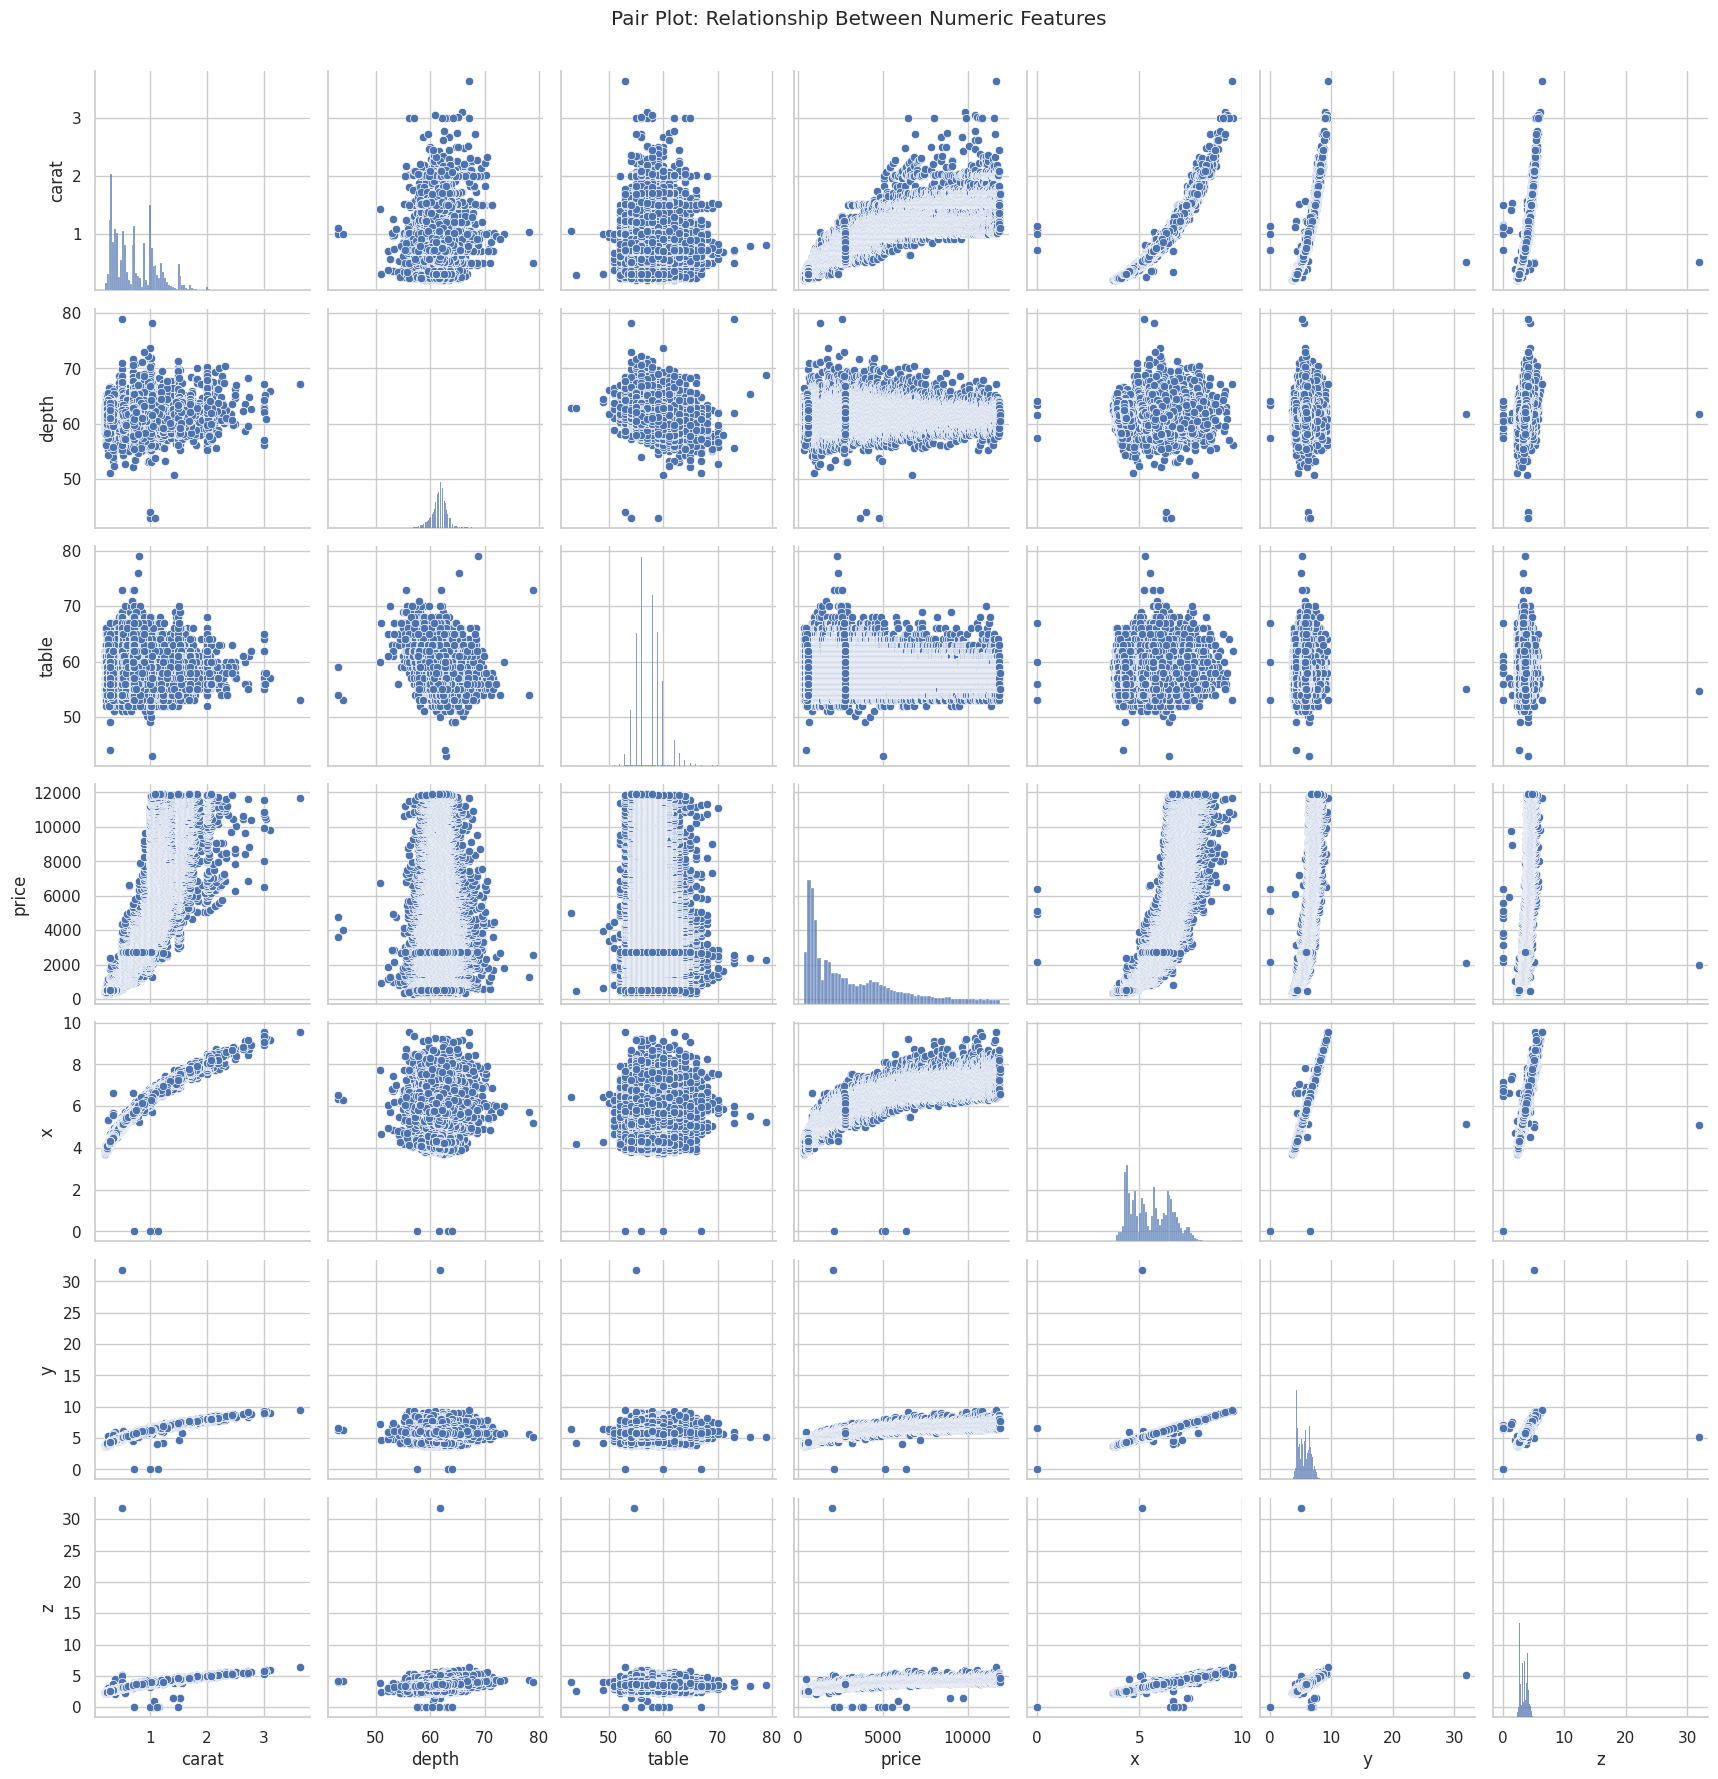

In [45]:
# ---------- 3.7 PAIR PLOT (numeric features) ----------
# Choose some numeric columns
pair_cols = [col for col in ["carat", "depth", "table", "price", "x", "y", "z"] if col in df.columns]

if len(pair_cols) >= 2:
    sns.pairplot(df[pair_cols])
    plt.suptitle("Pair Plot: Relationship Between Numeric Features", y=1.02)
    plt.show()

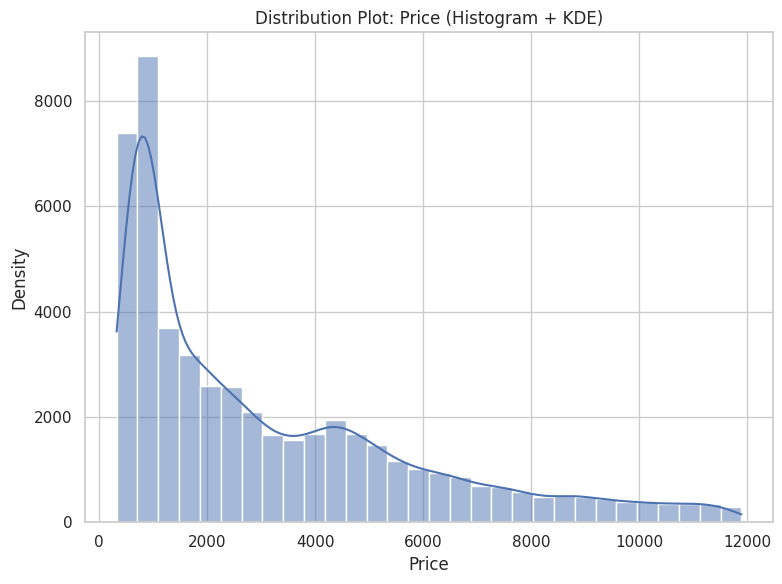

In [46]:
# ---------- 3.8 DISTRIBUTION PLOT (KDE + histogram for price) ----------
if "price" in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df["price"], kde=True, bins=30)
    plt.title("Distribution Plot: Price (Histogram + KDE)")
    plt.xlabel("Price")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

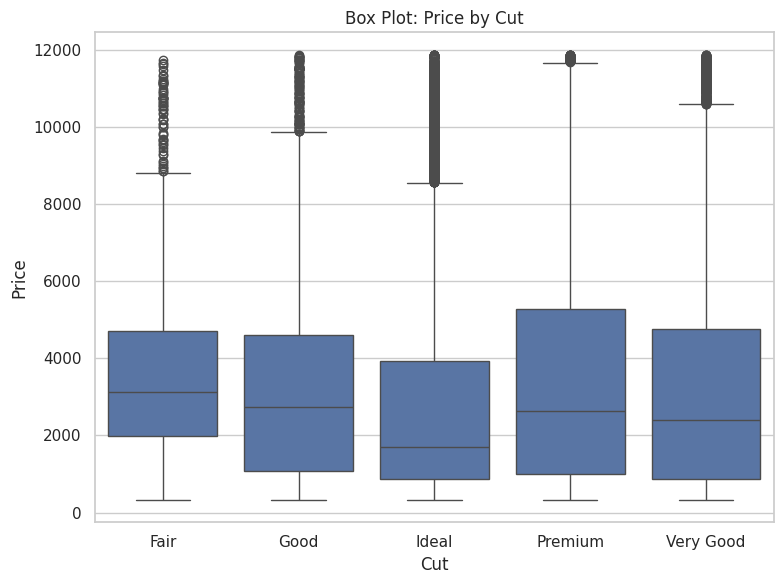

In [47]:
# ---------- 3.9 BOX PLOT (price by cut) ----------
if {"cut", "price"}.issubset(df.columns):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="cut", y="price")
    plt.title("Box Plot: Price by Cut")
    plt.xlabel("Cut")
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()


# 4. COMBINED VISUALIZATIONS FOR STORYTELLING

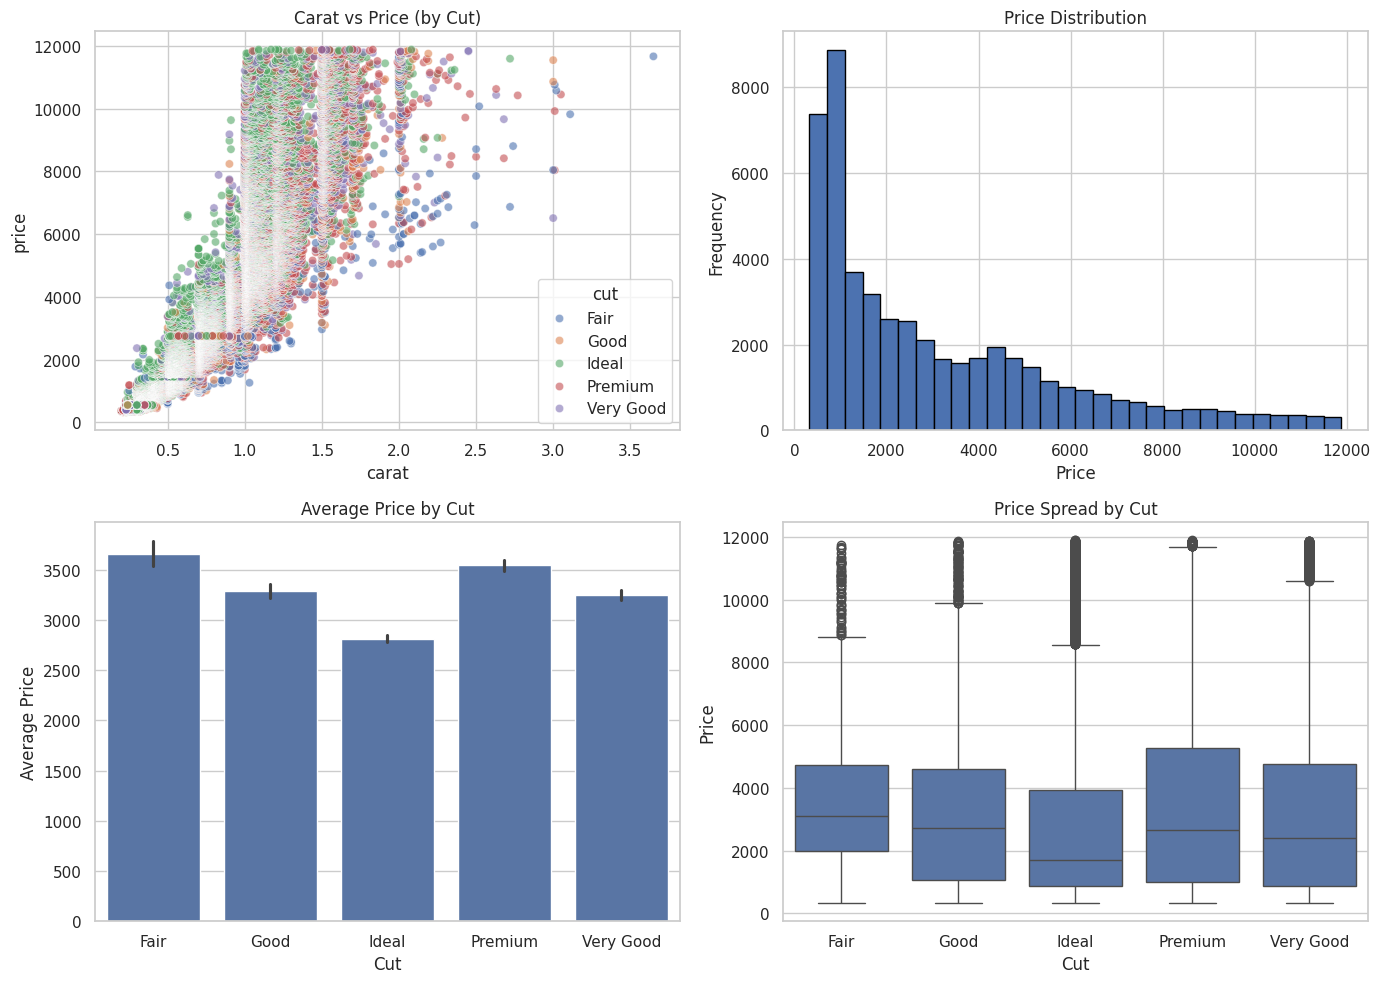

In [48]:
if {"carat", "price", "cut"}.issubset(df.columns):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # 4.1 Scatter: carat vs price
    sns.scatterplot(data=df, x="carat", y="price", hue="cut", ax=axes[0, 0], alpha=0.6)
    axes[0, 0].set_title("Carat vs Price (by Cut)")

    # 4.2 Histogram: price
    axes[0, 1].hist(df["price"], bins=30, edgecolor="black")
    axes[0, 1].set_title("Price Distribution")
    axes[0, 1].set_xlabel("Price")
    axes[0, 1].set_ylabel("Frequency")

    # 4.3 Bar: avg price by cut
    sns.barplot(data=df, x="cut", y="price", estimator="mean", ax=axes[1, 0])
    axes[1, 0].set_title("Average Price by Cut")
    axes[1, 0].set_xlabel("Cut")
    axes[1, 0].set_ylabel("Average Price")

    # 4.4 Box: price by cut
    sns.boxplot(data=df, x="cut", y="price", ax=axes[1, 1])
    axes[1, 1].set_title("Price Spread by Cut")
    axes[1, 1].set_xlabel("Cut")
    axes[1, 1].set_ylabel("Price")

    plt.tight_layout()
    plt.show()

**5 Heatmap**

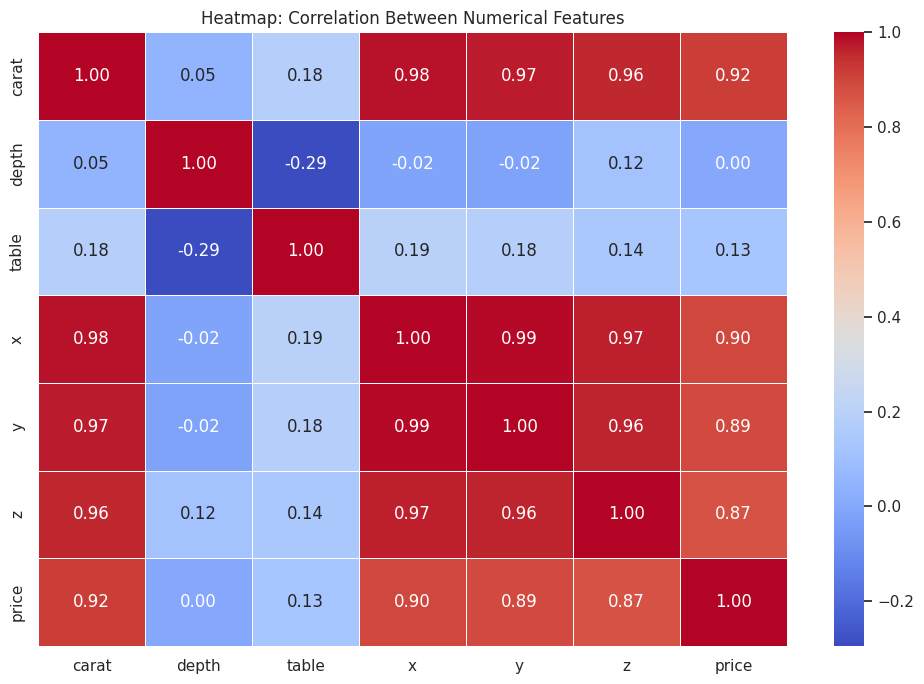

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Heatmap: Correlation Between Numerical Features")
plt.tight_layout()
plt.show()


# 6. SIMPLE TEXT INSIGHTS

In [50]:
if {"cut", "price", "carat"}.issubset(df.columns):
    insights = {
        "Cut vs Count": f"The most common cut in the dataset is: {df['cut'].value_counts().idxmax()}",
        "Price vs Carat": "From the scatter and line plots, price generally increases with carat.",
        "Price by Cut": "Box and bar plots show that better cuts tend to have higher median prices.",
        "Price Distribution": "Histogram and distribution plot show whether prices are skewed (usually right-skewed: many cheaper diamonds, few very expensive ones).",
    }

    print("\nKEY INSIGHTS:")
    for k, v in insights.items():
        print(f"- {k}: {v}")



KEY INSIGHTS:
- Cut vs Count: The most common cut in the dataset is: Ideal
- Price vs Carat: From the scatter and line plots, price generally increases with carat.
- Price by Cut: Box and bar plots show that better cuts tend to have higher median prices.
- Price Distribution: Histogram and distribution plot show whether prices are skewed (usually right-skewed: many cheaper diamonds, few very expensive ones).
